In [1]:
import numpy as np
from mat4py import loadmat
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import preprocessing

In [2]:
data = loadmat('Data/Dataset1.mat')
data2 = loadmat('Data/Dataset2.mat')
data.keys()

dict_keys(['X', 'y', 'yval', 'Xval'])

In [3]:
data.keys()
x = data['X']
y = data['y']
label = []
for i in range(len(y)):
    label.append(y[i][0])
    
datas = pd.DataFrame(x, columns=['x1','x2'])
datas['y'] = label

In [4]:

x2 = data2['X']
y2= data2['y']
label2 = []
for i in range(len(y2)):
    label2.append(y2[i][0])
    
datas2 = pd.DataFrame(x2, columns=['x1','x2'])
datas2['y'] = label2

In [5]:
class PreprocessData:
    def NomalizeData(Data):
        Data=np.array(Data)
        lenght = len(Data)
        normalizedData = []
        
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame
    

In [6]:
#split data1
Dataset = PreprocessData.TestAndTrain(datas , 80)


TrainData = Dataset[0]
TestData = Dataset[1]
data = np.array(TrainData)
Y = TrainData['y']
Y = np.array(Y)
data = TrainData.drop('y',axis=1)
X = np.array(data)
y_test = np.array(TestData['y'])
X_test = np.array(TestData.drop('y',axis=1))

#split data2 
Dataset2 = PreprocessData.TestAndTrain(datas2 , 80)


TrainData2 = Dataset2[0]
TestData2 = Dataset2[1]
data2 = np.array(TrainData2)
Y2 = TrainData2['y']
Y2 = np.array(Y2)
data2 = TrainData2.drop('y',axis=1)
X2 = np.array(data2)
y_test2 = np.array(TestData2['y'])
X_test2 = np.array(TestData2.drop('y',axis=1))

In [7]:

Y[Y==0] = -1
Y2[Y2==0] = -1
y_test[y_test==0] = -1
y_test2[y_test2==0] = -1

In [8]:
class SVMclassifier:
    def __init__(self , C=100):
        self.C = C
        self.W = 0
        self.b = 0
    def Calcloss(self , W , b , X,Y):
        loss = 0.0
        loss += (np.dot(W , W.T) / 2)
        
        for i in range (len(X)):
            ti = Y[i] * (np.dot(W,X[i].T)+b)
            loss += self.C * max(0 , 1-ti)
        return loss[0][0]
    def fit(self , X , Y , size = 1000, alpha = 0.001 , itration = 1000):
        numberOfFeatures = X.shape[1]
        numberOfsamples = len(X)
        n = alpha 
        c = self.C
        losess = []
        
        indexes = np.arange(numberOfsamples)
        np.random.shuffle(indexes)
        W = np.zeros((1,numberOfFeatures))
        
        bias = 0 
        
        for i in range(itration):
            l = self.Calcloss(W , bias ,X , Y)
            losess.append(l)
            for start in range( 0 , numberOfsamples , size  ):
                wgradiant = 0
                biasgradiant = 0 
                
                for e in range (start , start + size):
                     if (e < numberOfsamples):
                            x = indexes[e]
                            ti = Y[x] * (np.dot(W,X[e].T)+bias)
                            if (ti > 1):
                                #check !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                continue
                            else:
                                wgradiant += c *Y[x] *X[x]
                                biasgradiant += c *Y[x]
                                
                W = W - (n*W )+( n*wgradiant)
                bias = bias + n * biasgradiant
        self.W = W
        self.b = bias 
        return self.W , self.b , losess 
    
                                
                                
            
    

In [9]:
def sigmoid(z):
    return (1 / (1 + np.exp(-1*z)))
def hypotesis(x,w,b):
    z = b+w[0][0]*x[:,0] + w[0][1]*x[:,1]
    yhat = sigmoid(z)
    return yhat

def hypotesis1(x,w,b):
    z = b+w[0]*x[:,0] + w[1]*x[:,1]
    yhat = sigmoid(z)
    return yhat
    
    

In [10]:
def plot_decision_boundary(X, w, b , y):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    x1 = np.array(x1)
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
   
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
   
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

Youre accuracy is  =  82.84023668639054


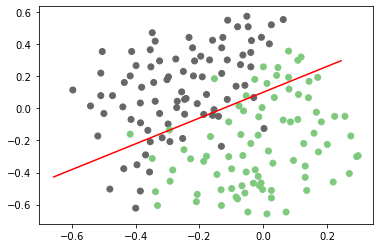

In [11]:
#train for C1 
svm = SVMclassifier(C=1)
w  , b  , losses = svm.fit(X,Y)
pred = hypotesis(X,w,b)
predicted = []
for i in range(len(pred)):
    if(pred[i] > 0.5):
        predicted.append(1)
    else:
        predicted.append(-1)
np.array(predicted)

predicted  = hypotesis(X,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(Y == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X[:,0],X[:,1] , c=Y , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  83.33333333333334


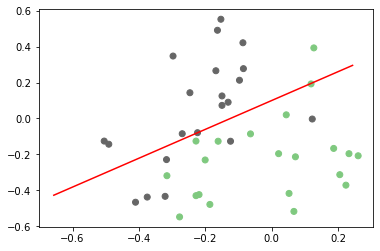

In [12]:
#test for C1 

predicted  = hypotesis(X_test,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(y_test == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X_test[:,0],X_test[:,1] , c=y_test , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  82.24852071005917


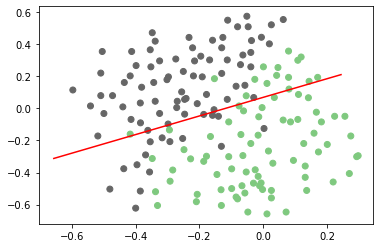

In [13]:
#train for C10
svm = SVMclassifier(C=10)
w  , b  , losses = svm.fit(X,Y)
pred = hypotesis(X,w,b)
predicted = []
for i in range(len(pred)):
    if(pred[i] > 0.5):
        predicted.append(1)
    else:
        predicted.append(-1)
np.array(predicted)

predicted  = hypotesis(X,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(Y == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X[:,0],X[:,1] , c=Y , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  78.57142857142857


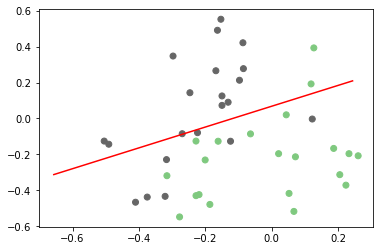

In [14]:
#test for C10

predicted  = hypotesis(X_test,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(y_test == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X_test[:,0],X_test[:,1] , c=y_test , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  81.65680473372781


/var/folders/gv/29bx0dbj5fvf2ql1sq4xwxsh0000gn/T/ipykernel_27698/3060243996.py:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-1*z)))


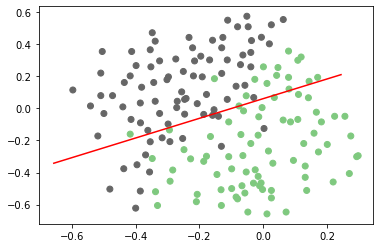

In [15]:
#train for C100
svm = SVMclassifier(C=100)
w  , b  , losses = svm.fit(X,Y)
pred = hypotesis(X,w,b)
predicted = []
for i in range(len(pred)):
    if(pred[i] > 0.5):
        predicted.append(1)
    else:
        predicted.append(-1)
np.array(predicted)

predicted  = hypotesis(X,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(Y == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X[:,0],X[:,1] , c=Y , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  78.57142857142857


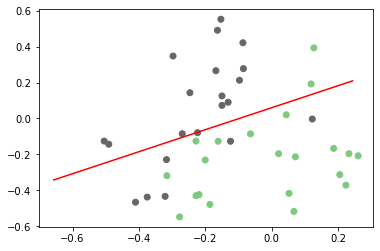

In [16]:
#test for C10

predicted  = hypotesis(X_test,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(y_test == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X_test[:,0],X_test[:,1] , c=y_test , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

In [17]:
svm2 = SVMclassifier()
w  , b  , losses = svm2.fit(X2,Y2)

Youre accuracy is  =  56.95652173913044


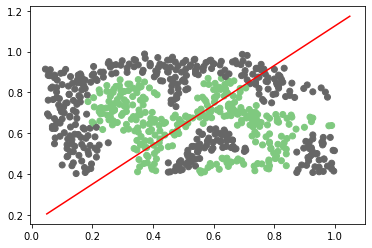

In [18]:
pred = hypotesis(X2,w,b)
predicted = []
for i in range(len(pred)):
    if(pred[i] > 0.5):
        predicted.append(1)
    else:
        predicted.append(-1)
np.array(predicted)

predicted  = hypotesis(X2,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc2 = np.mean(Y2 == predicted)
print('Youre accuracy is  = ',acc2*100)
x1 = np.arange(min(X2[:,0])*1.1,max(X2[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X2[:,0],X2[:,1] , c=Y2 , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

In [19]:
def RBF(X, gamma):
    
    # Free parameter gamma
    if gamma == None:
        gamma = 1.0/X.shape[1]
        
    # RBF kernel Equation
    K = np.exp(-gamma * np.sum((X - X[:,np.newaxis])**2, axis = -1))
    
    return K

In [20]:
def phi(X):
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1*X1 + X2*X2
    Xn = np.zeros((X.shape[0],3))
    Xn[:,:-1] = X
    Xn[:,-1] = X3
    return Xn
    
    
    

In [21]:
def plt3d(x ,  y, show=True):
    fig = plt.figure(figsize=(10,10))
    ax= fig.add_subplot(111,projection='3d')
    
    ax.scatter(x[:,0], x[:,1],x[:,2] , zdir='z',s=42, c=y,depthshade=True)
    if(show == True):
        plt.show()
    return ax
    

In [22]:
def predict(x,y,w,b):
    pred = hypotesis(x,w,b)


    predicted  = hypotesis(x,w,b)
    predicted[predicted > 0.5] =1
    predicted[predicted <= 0.5] = -1
    acc2 = np.mean(y == predicted)
    print('Youre accuracy is  = ',acc2*100)
    

In [23]:
# Xn = phi(X2)

In [24]:
# plt3d(Xn , Y2)

In [25]:
# svm3 = SVMclassifier()
# w  , b  , losses = svm3.fit(Xn,Y2)

In [26]:
# pred = hypotesis(Xn,w,b)
# predicted = []
# for i in range(len(pred)):
#     if(pred[i] > 0.5):
#         predicted.append(1)
#     else:
#         predicted.append(-1)
# np.array(predicted)

# predicted  = hypotesis(Xn,w,b)
# predicted[predicted > 0.5] =1
# predicted[predicted <= 0.5] = -1
# acc2 = np.mean(Y2 == predicted)
# print('Youre accuracy is  = ',acc2*100)

In [27]:
# Xk = RBF(X2 , 30)

In [28]:
# svm4 = SVMclassifier()
# w  , b  , losses = svm4.fit(Xk,Y2)


In [29]:
# pred = hypotesis(Xk,w,b)


# predicted  = hypotesis(Xk,w,b)
# # print(predicted)
# predicted[predicted > 0.5] =1
# predicted[predicted <= 0.5] = -1
# acc2 = np.mean(Y2 == predicted)
# print('Youre accuracy is  = ',acc2*100)


In [30]:
# from sklearn.datasets import make_circles
# XC,YC = make_circles(n_samples=500 , noise=0.02)
# plt.scatter(XC[:,0],XC[:,1] , c=YC )

In [31]:
# XC3 = phi(XC)

In [32]:
# plt3d(XC3,YC)

In [33]:
# svm5 = SVMclassifier()
# w  , b  , losses = svm5.fit(XC,YC)
# predict(XC,YC,w,b)

In [34]:
# svm6 = SVMclassifier()
# w  , b  , losses = svm6.fit(XC3,YC)
# predict(XC,YC,w,b)

In [35]:
# XCR = RBF(XC,30)

In [36]:
# x,y:np.exp(-gamma*np.sum((y-x[:,np.newaxis])**2,axis=-1))

# svm7 = SVMclassifier()
# w  , b  , losses = svm7.fit(XCR,YC)
# predict(XC,YC,w,b)

In [37]:
class SVM:
  def __init__(self, kernel='linear', C=10.0, max_iter=500, degree=3, gamma=1):
    self.kernel = {'poly'  : lambda x,y: np.dot(x, y.T)**degree,
                   'rbf'   : lambda x,y: np.exp(-gamma*np.sum((y - x[:,np.newaxis])**2, axis=-1)),
                   'linear': lambda x,y: np.dot(x, y.T)}[kernel]
    self.C = C
    self.max_iter = max_iter

  def restrict_to_square(self, t, v0, u):
    t = (np.clip(v0 + t*u, 0, self.C) - v0)[1]/u[1]
    return (np.clip(v0 + t*u, 0, self.C) - v0)[0]/u[0]

  def fit(self, X, y):
    self.X = X.copy()
    self.y = y * 2 - 1
    self.lambdas = np.zeros_like(self.y, dtype=float)
    self.K = self.kernel(self.X, self.X) * self.y[:,np.newaxis] * self.y
    
    for _ in range(self.max_iter):
      for idxM in range(len(self.lambdas)):
        idxL = np.random.randint(0, len(self.lambdas))
        Q = self.K[[[idxM, idxM], [idxL, idxL]], [[idxM, idxL], [idxM, idxL]]]
        v0 = self.lambdas[[idxM, idxL]]
        k0 = 1 - np.sum(self.lambdas * self.K[[idxM, idxL]], axis=1)
        u = np.array([-self.y[idxL], self.y[idxM]])
        t_max = np.dot(k0, u) / (np.dot(np.dot(Q, u), u) + 1E-15)
        self.lambdas[[idxM, idxL]] = v0 + u * self.restrict_to_square(t_max, v0, u)
    
    idx, = np.nonzero(self.lambdas > 1E-15)
    self.b = np.mean((1.0 - np.sum(self.K[idx] * self.lambdas, axis=1)) * self.y[idx])
  
  def decision_function(self, X):
    return np.sum(self.kernel(X, self.X) * self.y * self.lambdas, axis=1) + self.b

  def predict(self, X):
    
    ypred = (np.sign(self.decision_function(X)) + 1) // 2
    
    # ypred[ypred == 0] = -1
    return ypred


In [38]:
Y2[Y2==-1] = 0
sv = SVM(kernel='rbf')
sv.fit(X2,Y2)
r = sv.decision_function(X2)
pred = sv.predict(X2)
# Y2[Y2==0] = -1
pred


array([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0.

In [39]:
# pred  = sv.predict(X_test2)
# # pred = sv.predict(X2)
# pred

In [40]:
np.mean(Y2 == pred)

0.7753623188405797

In [54]:
def test_plot(X, y, svm_model, axes, title):
  plt.axes(axes)
  xlim = [np.min(X[:, 0]), np.max(X[:, 0])]
  ylim = [np.min(X[:, 1]), np.max(X[:, 1])]
  print('step0')
  xx, yy = np.meshgrid(np.linspace(*xlim, num=700), np.linspace(*ylim, num=700))
  rgb=np.array([[210, 0, 0], [0, 0, 150]])/255.0
  print('step1')
  svm_model.fit(X, y)
  z_model = svm_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  Z = z_model.reshape(xx.shape)
  print('step2')
  plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  plt.contour(xx, yy, z_model, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
  plt.contourf(xx, yy, np.sign(z_model.reshape(xx.shape)), alpha=0.3, levels=2, cmap=ListedColormap(rgb), zorder=1)
  # plt.contour(xx, yy, Z, cmap=plt.cm.gray, levels=[0.5])
  plt.title(title)

step0
step1
step2
step0
step1


/var/folders/gv/29bx0dbj5fvf2ql1sq4xwxsh0000gn/T/ipykernel_27698/3309194586.py:14: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, z_model, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


step2


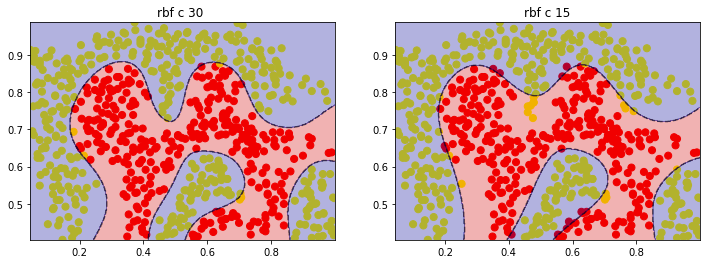

In [63]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
test_plot(X2 , Y2 , SVM(kernel='rbf', C=30, max_iter=500, gamma=30) , axs[0] , 'rbf c 30 ')
test_plot(X2 , Y2 , SVM(kernel='rbf', C=15, max_iter=500, gamma=15) , axs[1] , 'rbf c 15')

step0
step1
step2
step0
step1


/var/folders/gv/29bx0dbj5fvf2ql1sq4xwxsh0000gn/T/ipykernel_27698/3309194586.py:14: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, z_model, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


step2


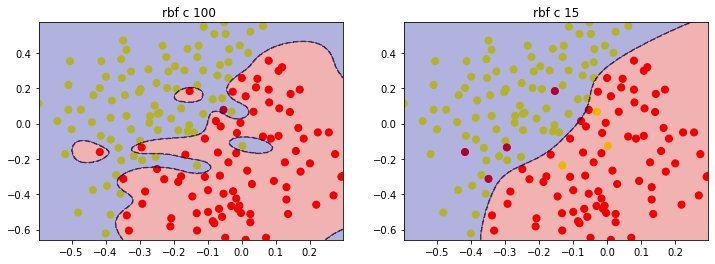

In [61]:
Y[Y==-1] = 0
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
test_plot(X , Y , SVM(kernel='rbf', C=100, max_iter=500, gamma=100) , axs[0] , 'rbf c 100 ')
test_plot(X , Y , SVM(kernel='rbf', C=15, max_iter=500, gamma=15) , axs[1] , 'rbf c 15')

In [64]:
# def gaussian_kernel(x1, x2, sigma):
#     return np.exp(-1 * (sum(np.abs(x1 - x2)**2) / (2.0 * (sigma**2))))
# def plot_twoclass_data(X, y, xlabel, ylabel, legend):
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     ax.set_adjustable('box')
#     X0 = X[np.where(y == 0)]
#     X1 = X[np.where(y == 1)]
#     plt.scatter(X0[:, 0], X0[:, 1], c='red', s=80, label=legend[0])
#     plt.scatter(X1[:, 0], X1[:, 1], c='green', s=80, label=legend[1])
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.legend(loc="upper right")
#     return ax
# def plot_decision_kernel_boundary(X, y, scaler, sigma, clf,  xlabel, ylabel, legend):

#     ax = plot_twoclass_data(X, y, xlabel, ylabel, legend)
#     ax.autoscale(False)

#     # create a mesh to plot in
#     print('YOU are Here !')
#     h = 0.05
#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
#                          np.arange(x2_min, x2_max, h))
    
    
#     # xlim = [np.min(X[:, 0]), np.max(X[:, 0])]
#     # ylim = [np.min(X[:, 1]), np.max(X[:, 1])]
#     # xx1,xx2  = np.meshgrid(np.arange(*xlim, h), np.arange(*ylim, h))

#     ZZ = np.array(np.c_[xx1.ravel(), xx2.ravel()])
#     K = np.array([gaussian_kernel(x1, x2, sigma)
#                   for x1 in ZZ for x2 in X]).reshape((ZZ.shape[0], X.shape[0]))
#     print('K = =', K)

#     # need to scale it
#     scaleK = scaler.transform(K)
#     print('scaledK = ', scaleK)

#     KK = np.vstack([np.ones((scaleK.shape[0],)), scaleK.T]).T
    
#     print('KK IS = ',KK)

#     # make predictions on this mesh (but add intercept term)
#     # return KK
#     Z = clf.predict(KK)
#     # Z= svm_model.decsion_function(KK)

#     # Put the result into a color contour plot
#     Z = Z.reshape(xx1.shape)
#     plt.contour(xx1, xx2, Z, cmap=plt.cm.gray, levels=[0.5])
#     plt.show()

In [65]:

# sigma = 0.02

# # compute the kernel (slow!)

# K = np.array([gaussian_kernel(x1,x2,sigma) for x1 in X2 for x2 in X2]).reshape(X2.shape[0],X2.shape[0])

# # scale the kernelized data matrix

# scaler = preprocessing.StandardScaler().fit(K)
# scaleK = scaler.transform(K)

# # add the intercept term

# KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T

# # transform y from [0,1] to [-1,1]

# yy = np.ones(Y2.shape)
# # yy[Y2== 0] = -1

# yy[Y2==-1] = 0
# svm = SVM(kernel='rbf')
# svm.fit(KK,yy)
# # pred = svm.predict(KK)
# # a = np.mean(yy == pred)
# print('fited go in ')
# # visualize the boundary

# plot_decision_kernel_boundary(X2,Y2,scaler,sigma,svm,'','',['neg','pos'])

In [66]:

# x1 = np.array([1,2,1])
# x2 = np.array([0,4,-1])
# sigma = 2

# print ("Guassian kernel value (should be around 0.324652) = ",gaussian_kernel(x1,x2,sigma))


In [67]:
# KK.shape